In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("./data/stud.csv")

In [ ]:
# Top 5 recors
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# dataset dimensionality
df.shape

(1000, 8)

# Checks to perform
1. Missing values
2. Check duplicates
3. Check datatypes
4. Check unique values in each column
5. Check statistics of the dataset
6. Check for categories in categorical columns

In [5]:
# missing value check
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# dupilicate check
df.duplicated().sum()

np.int64(0)

In [7]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# checking unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# checking statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
# checking for different categories in categorical columns
from pprint import pprint
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]

for col in categorical_columns:
    print(f"categories in {col}: ")
    print(df[col].unique())
    print("\n")

categories in gender: 
['female' 'male']


categories in race_ethnicity: 
['group B' 'group C' 'group A' 'group D' 'group E']


categories in parental_level_of_education: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


categories in lunch: 
['standard' 'free/reduced']


categories in test_preparation_course: 
['none' 'completed']




In [23]:
# printing out numerical and categorical columns
numerical_features = [col for col in df.columns if df[col].dtype != "O"]
categorical_columns = [col for col in df.columns if df[col].dtype == "O"]

print(f"Numberical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_columns)}): {categorical_columns}")

Numberical features (3): ['math_score', 'reading_score', 'writing_score']
Categorical features (5): ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
# adding two new columns: Total score, Average score
df["Total Score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average Score"] = df["Total Score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
# getting number of students with top scores
math_top = df[df["math_score"] == 100]["Average Score"].count()
writing_top = df[df["writing_score"] == 100]["Average Score"].count()
reading_top = df[df["reading_score"] == 100]["Average Score"].count()

print(f"Number of students with top math score: {math_top}")
print(f"Number of students with top writing score: {writing_top}")
print(f"Number of students with top reading score: {reading_top}")

Number of students with top math score: 7
Number of students with top writing score: 14
Number of students with top reading score: 17


In [34]:
# getting number of students who scored below 20 in each subject
math_below_20 = df[df["math_score"] <= 20]["Average Score"].count()
writing_below_20 = df[df["writing_score"] <= 20]["Average Score"].count()
reading_below_20 = df[df["reading_score"] <= 20]["Average Score"].count()

print(f"Number of students with below 20 math score: {math_below_20}")
print(f"Number of students with below 20 writing score: {writing_below_20}")
print(f"Number of students with below 20 reading score: {reading_below_20}")

Number of students with below 20 math score: 4
Number of students with below 20 writing score: 3
Number of students with below 20 reading score: 1


# Histograms and KDE Plots

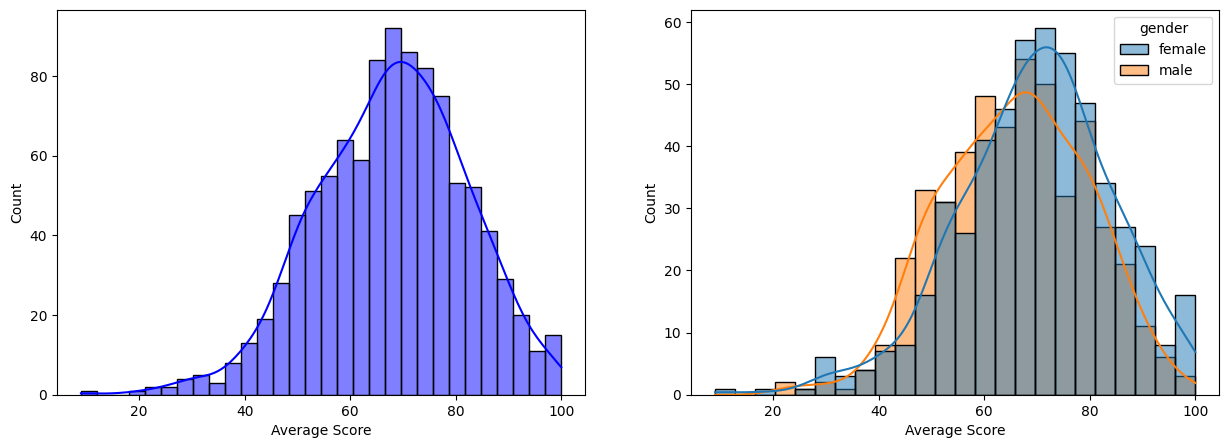

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Average Score", bins=30, kde=True, color="blue")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="Average Score", kde=True, hue="gender")
plt.show()